# Exercise - Simple Linear Regression



In this notebook you can check your understanding of linear regression and implement a linear regression model with scikit-learn by yourself. 




## Learning Objectives



At the end of this notebook you should be able to 
- describe the relationship between two variables.
- train a linear regression model with scikit-learn.
- interpret the $R^2$ of a linear regression model.

## Question 1 



The scatter plots below show the relationship between height, diameter, and volume of timber in 31 felled black cherry trees. The diameter of the tree is measured 4.5 feet above the ground.  

<img src="images/lin_reg_ex_1.png" width="600">  

**(a) Describe the relationship between volume and height of these trees.**

**(b) Describe the relationship between volume and diameter of these trees.**

**(c) Suppose you measured the height and diameter of another black cherry tree. Which of these variables would be better for predicting the wood volume of this tree using a simple linear regression model? Explain your reasoning.**

## Question 2 

The file `utils.csv` in your data folder contains information about the average utility bills for homes of a particular size and the average monthly temperature.  

**(a) Load the data:**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("data/utils.csv")
df

,Month,Average Bill,Average Monthly Temperature
0,Jan,148.5,38
1,Feb,136.5,45
2,Mar,117.0,49
3,Apr,91.5,57
4,May,82.5,69
5,Jun,94.5,78
6,Jul,120.0,84
7,Aug,142.5,89
8,Sep,97.5,79
9,Oct,84.0,64


**(b) Make a scatter plot of the data average bill vs average monthly temperature. Which variable would make the most sense as the response variable?**

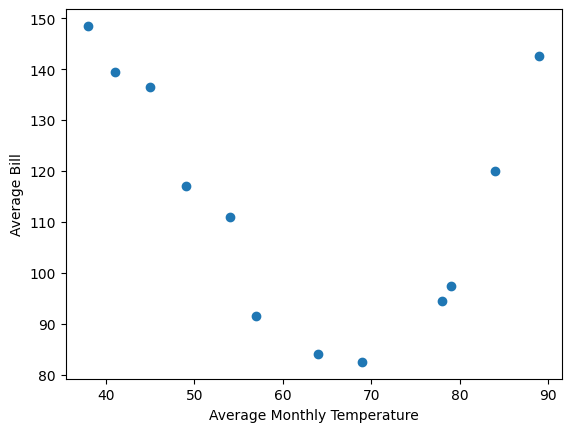

In [4]:
plt.scatter(df['Average Monthly Temperature'], df['Average Bill'])

plt.xlabel("Average Monthly Temperature")
plt.ylabel("Average Bill")
plt.show()

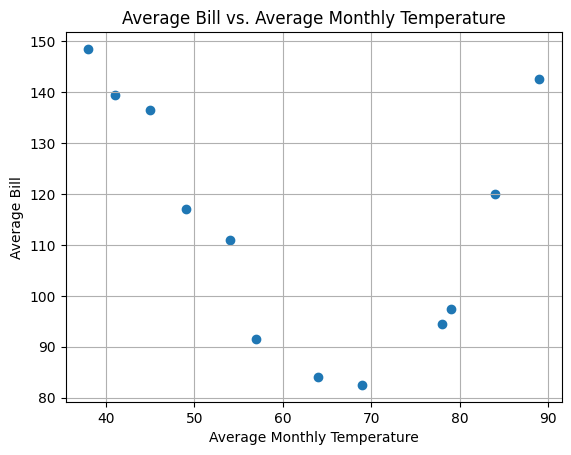

In [6]:
import matplotlib.pyplot as plt

# Data
months = df['Month']
average_bill = df['Average Bill']
average_temp = df['Average Monthly Temperature']

# Scatter plot
plt.scatter(average_temp, average_bill)
plt.xlabel('Average Monthly Temperature')
plt.ylabel('Average Bill')
plt.title('Average Bill vs. Average Monthly Temperature')
plt.grid(True)
plt.show()


Now, to determine which variable makes the most sense as the response variable, we need to consider the context of the data and the research question we want to answer. The response variable is the one that we are trying to predict or explain. Here are two possible scenarios:

- **Energy Consumption Analysis**: If we are trying to understand how "Average Bill" (energy consumption) changes with the variation in "Average Monthly Temperature," then "Average Bill" would be the response variable. In this case, we are interested in explaining energy consumption based on temperature changes.

- **Weather Impact Analysis**: If we are trying to understand how "Average Monthly Temperature" is affected by "Average Bill" (maybe heating or cooling expenses), then "Average Monthly Temperature" would be the response variable. In this case, we are interested in understanding how temperature is influenced by energy consumption.

The choice of response variable depends on the research question and the specific analysis we want to perform.

**(c) Have a look at the plot above. How would you describe the relationship between the variables?** 

**Curvilinear Relationship:** If the points on the scatter plot form a curve (concave or convex), it indicates a curvilinear relationship. This means that the relationship between the variables is not a simple straight line, but rather follows a more complex curve.

**(d) Train a simple linear regression model using scikit-learn**

In [8]:
X = df[['Average Monthly Temperature']]  # Input features (Independent variable)
y = df['Average Bill']                  # Target variable (Dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)



Coefficients: [-0.28333333]
Intercept: 132.10555555555555


**(e) Calculate and interpret the value of $R^2$.**  

In [9]:
from sklearn.metrics import r2_score

# Calculate R-squared for the test set predictions
r2 = r2_score(y_test, y_pred)

# Interpretation
print(f"R-squared value: {r2:.3f}")

R-squared value: 0.204


An R-squared value close to 0 indicates that the model does not explain much of the variance in the target variable. It suggests that the model does not fit the data well or that the target variable is not strongly related to the input features.

**(f) Print the intercept and slope/coefficient and interpret them in terms a home owner would understand.**

In [10]:
# Print the coefficients and intercept of the model
print("Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)

Coefficients: [-0.28333333]
Intercept: 132.10555555555555


- Intercept (132.10555): The intercept represents the value of the predicted target variable (in this case, "Average Bill") when the input feature (independent variable) is equal to zero. However, in this specific dataset, it may not have a practical interpretation because the "Average Monthly Temperature" cannot be zero in the real world.

- Coefficient (-0.28333): The coefficient represents the rate of change in the predicted target variable (again, "Average Bill") for each one-unit change in the input feature ("Average Monthly Temperature"). In this case, since the coefficient is negative (-0.28333), it suggests that as the "Average Monthly Temperature" increases by one unit, the "Average Bill" tends to decrease by approximately 0.28333 units.

**(g) Use your fitted model to estimate the average utility bill if the average monthly temperature is 120 degrees. Do you think that your answer is reasonable? Why or why not?** 

In [21]:
avg_monthly_temp = 120
print(f"Average Monthly Bill is {lr_model.predict([[avg_monthly_temp]])[0]}, when Average Monthly Temperature is {avg_monthly_temp}")

Average Monthly Bill is 98.10555555555558, when Average Monthly Temperature is 120


/Users/kavishbhatia/neuefische/ds-linear-regression/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


It's important to be cautious when interpreting predictions from a linear regression model, especially when making predictions beyond the range of the data used to train the model. The dataset used to train the model likely includes temperature values within a specific range, and extrapolating outside of this range might not be reliable.

In this case, the estimated average utility bill of approximately 98.11 when the average monthly temperature is 120 degrees may not be reasonable for a few reasons:

- Extrapolation: The linear regression model is based on the observed data within the range of "Average Monthly Temperature" present in the dataset. Extrapolating the model to temperatures beyond this range might lead to less accurate predictions, as the relationship between temperature and utility bills might not be linear outside the observed range.

- Outliers: If the dataset used to train the model includes extreme or unusual data points, the model might not generalize well to extreme temperature values like 120 degrees.

- Non-linearity: It's possible that the relationship between temperature and utility bills is not perfectly linear. In such cases, a linear model might not accurately capture the relationship.

